<a href="https://colab.research.google.com/github/Moonak/Stocks/blob/master/S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r StockData
!rm -r Stocks
!git clone https://github.com/Moonak/StockData.git
!git clone https://github.com/Moonak/Stocks.git
from Stocks.stock import load
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from os import listdir
data = [Files for Files in listdir('StockData')]
print('Number of NAMDS are :', len(data))

rm: cannot remove 'StockData': No such file or directory
rm: cannot remove 'Stocks': No such file or directory
Cloning into 'StockData'...
remote: Enumerating objects: 4788, done.
remote: Total 4788 (delta 0), reused 0 (delta 0), pack-reused 4788
Receiving objects: 100% (4788/4788), 27.13 MiB | 3.43 MiB/s, done.
Resolving deltas: 100% (3437/3437), done.
Cloning into 'Stocks'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 102 (delta 46), reused 41 (delta 11), pack-reused 0
Receiving objects: 100% (102/102), 1.06 MiB | 1.27 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Number of NAMDS are : 1667


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def cal(namad):
  #=time.
  namad.avarage(nweeks=1)
  namad.norm()
  namad.train(10,train_size=1,verbose=0,NPW=9,epochs=80,dropout_prob=.0,lstm_units=250, batch_size=1)
  plt.plot(np.arange(len(namad.close_avg)) , namad.close_avg,'r')
  plt.plot([int(1*(len(namad.close_avg)))+i for i in range(-9,1)],namad.estimate)
  plt.xlim(len(namad.close_avg)-10,len(namad.close_avg)+1)
  plt.ylim(min(np.min(namad.estimate[-10:]),np.min(namad.close_avg[-5:]))-0.1,\
           max(np.max(namad.estimate[-10:]),np.max(namad.close_avg[-5:])+0.1))
  plt.legend([namad.name])
  plt.savefig(namad.name+'.png')
  plt.show()
  print(namad.name)

In [0]:
namads = []
IndexErrorCounter=0
IsADirectoryErrorCounter=0
for namad in data:
  try: namads.append(load(namad))
  except IndexError: IndexErrorCounter+=1
  except IsADirectoryError: IsADirectoryErrorCounter+=1
print("IndexError=",IndexErrorCounter)
print("IsADirectoryError=",IsADirectoryErrorCounter)

IndexError= 324
IsADirectoryError= 1


In [0]:
AverageErrorCounter=0
for namad in namads:
  try:
    namad.avarage(nweeks=1)
    namad.norm()
  except: AverageErrorCounter+=1
print("AverageError=",AverageErrorCounter)

AverageError= 49


In [0]:
for namad in namads:
  if np.average(namad.vol[-10:])> 1e9 :
    print("#",namad.name,":",np.average(namad.vol[-10:]))

# Index Group 65 : 1049862475.1
# Main Board Index : 1583453882.5
# Top 50 Index : 1204438632.2
# TotalEquel Weithed : 2513071024.4
# Industy Index : 1452264530.3
# TotalEqualWeightPr : 2513071024.4
# Pasargad Bank-a : 2566666666.6666665
# Free Float Index : 2513071024.4
# Overall Index : 2513071024.4
# Total Price Index : 2513071024.4


In [0]:
trends=[]
for namad in namads:
  if np.average(namad.vol[-10:])> 1e8:
    print("#",namad.filename,":",np.average(namad.vol[-10:]))    
    try:
      print('#',namads.index(namad),'out of',len(namads))
      namad.train(8,train_size=1,NPW=9,epochs=20,dropout_prob=.0,lstm_units=200, batch_size=20)
      trends.append([namad, (namad.estimate[-2] - namad.estimate[-1]) / namad.estimate[-2]])
    except: print("faild")

In [0]:
for trend in trends:
   if -trend[1] > 0.10: print(trend[0].name,"\t",-100*trend[1])

Saderat Bank-a 	 10.81890536501698
Hepco-a 	 22.763284175523747
Index Group 70 	 26.123067339821354
Pars Khodro-a 	 17.606060634273643


In [0]:
RIIR1=load('RIIR1-a.csv')
IKCO1=load('IKCO1-a.csv')
SDLP1=load('SDLP1-a.csv')
PARK1=load('PARK1-a.csv')
BSHP1=load('BSHP1-a.csv')
PKOD1=load('PKOD1-a.csv')
#DT861=load('DT861-a.csv')
BSDR1=load('BSDR1-a.csv')

In [0]:
for n in [RIIR1,IKCO1,SDLP1,PARK1,BSHP1,PKOD1,BSDR1]:
  cal(n)

In [0]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(cal)(n) for n in [RIIR1,IKCO1,SDLP1,PARK1,BSHP1,PKOD1,BSDR1])

[None, None, None, None, None, None, None]

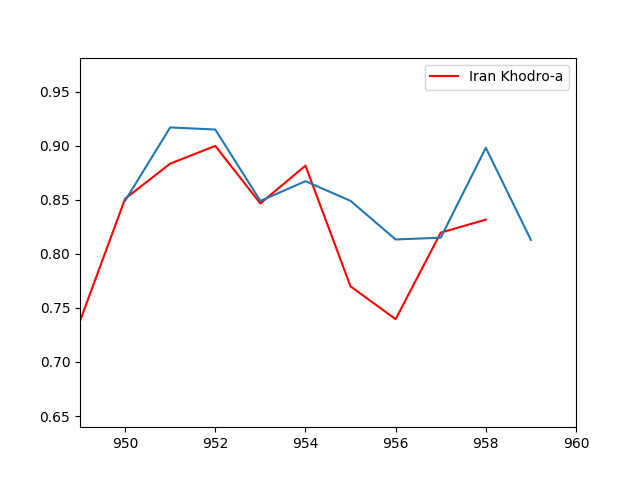

In [0]:
Image("Iran Khodro-a.png")

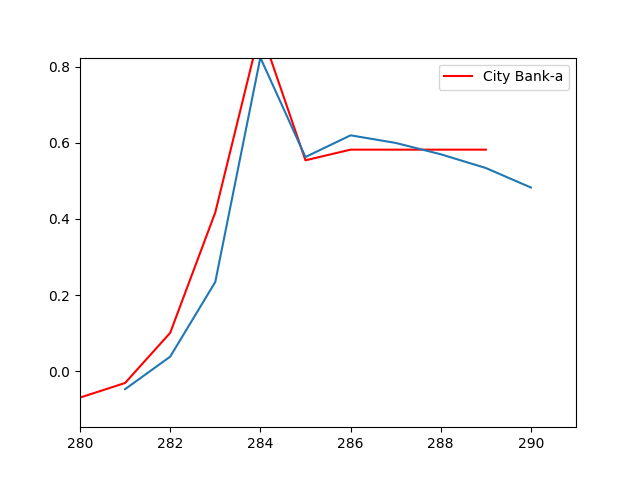

In [0]:
Image("City Bank-a.png")

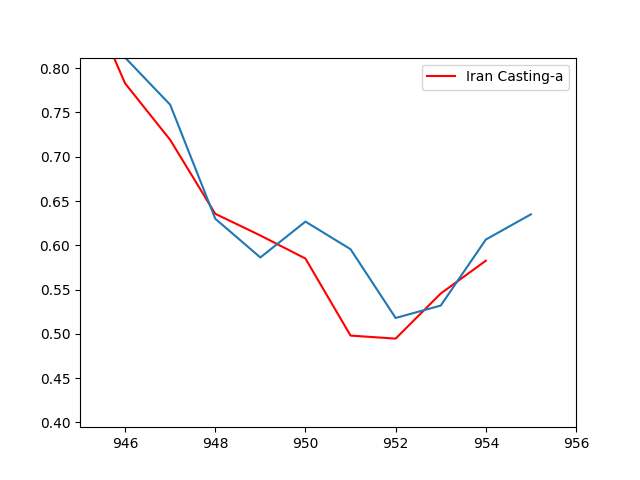

In [0]:
Image("Iran Casting-a.png")

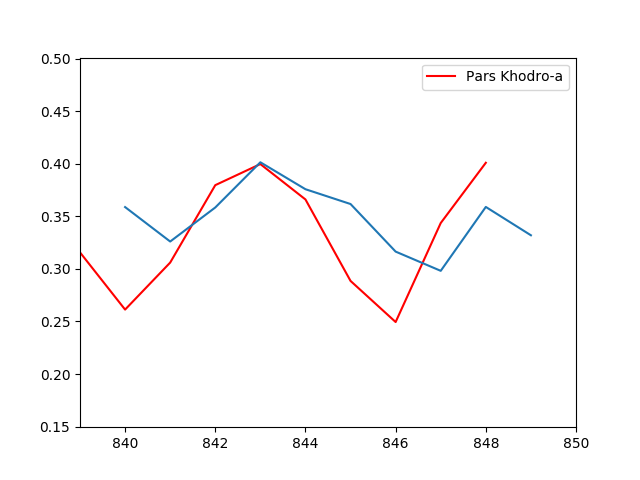

In [0]:
Image("Pars Khodro-a.png")

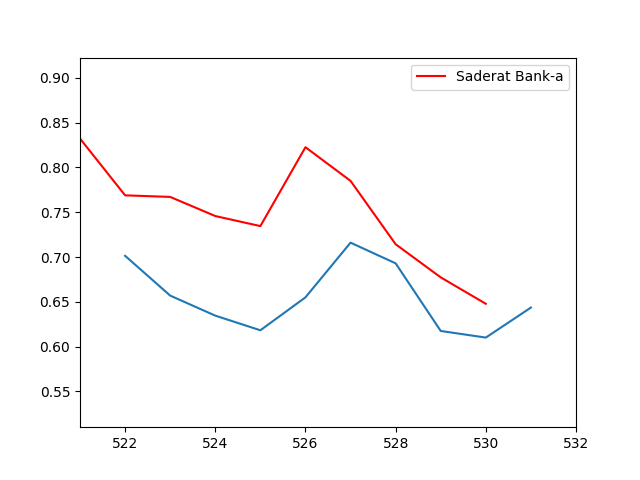

In [0]:
Image("Saderat Bank-a.png")

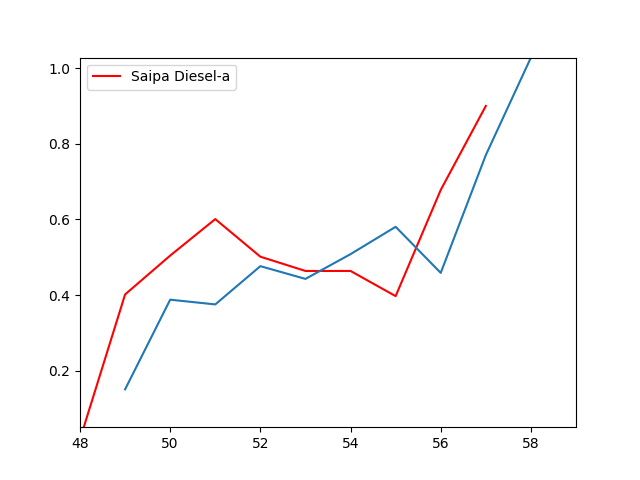

In [0]:
Image("Saipa Diesel-a.png")

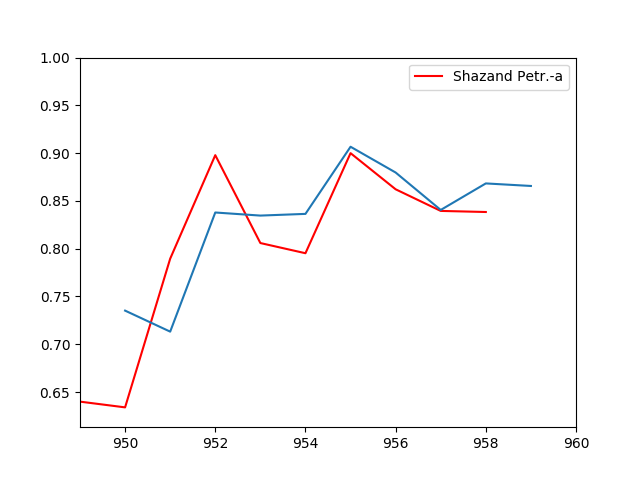

In [0]:
Image("Shazand Petr.-a.png")

In [0]:
RENA1=load("RENA1-a.csv")
BPAS1=load("BPAS1-a.csv")
BMPS1=load("BMPS1-a.csv")
"""
=load("")
=load("")
=load("")
"""

In [0]:
Parallel(n_jobs=-1)(delayed(cal)(n) for n in [RENA1,BPAS1,BMPS1])

[None, None, None]

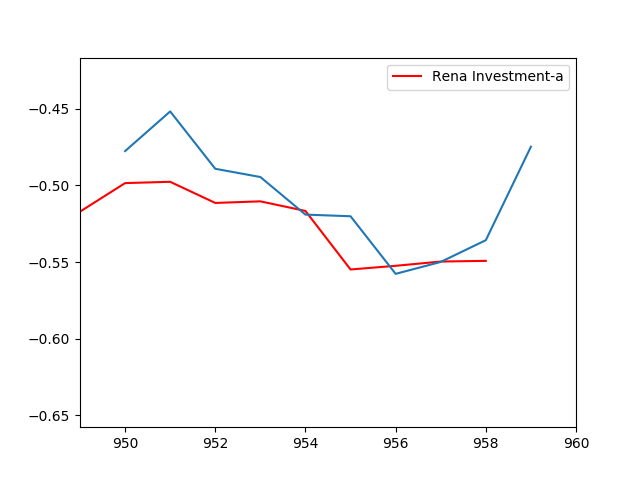

In [0]:
Image(RENA1.name+".png")

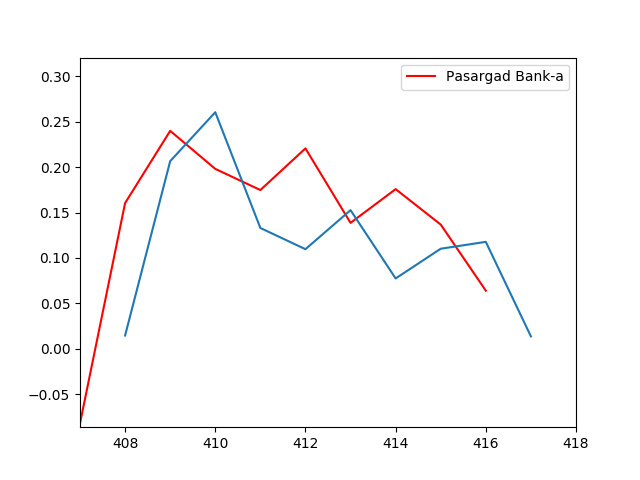

In [0]:
Image(BPAS1.name+".png")

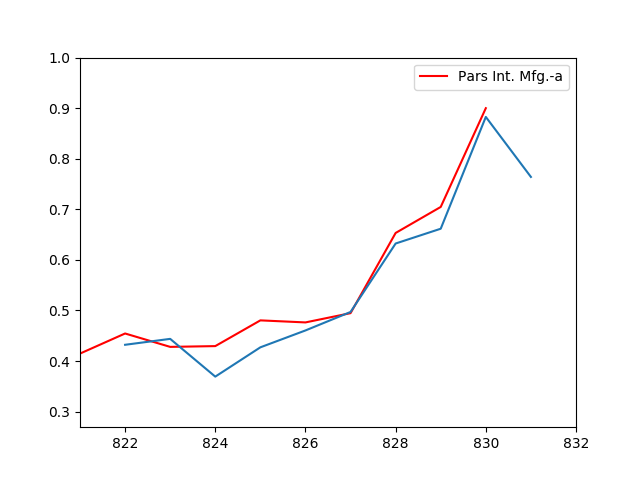

In [0]:
Image(BMPS1.name+".png")